In [1]:
#First : Importing Libraries
from ultralytics import YOLO
import cv2
import os
from ultralytics.yolo.utils.plotting import Annotator

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")



In [2]:
#Second : Function : Return the predication
def predict_image(image):
    results = model.predict(image,show_conf=True)
    return results

In [3]:
#Third : Function : Shows the image with boxes around the things and doesn't return anything
def show_image_after_classification(results,image,model):
    for r in results:    
            annotator = Annotator(image)
            boxes = r.boxes
            for box in boxes:
                if(box.conf > 0.6):
                    b = box.xyxy[0] 
                    c = box.cls
                    x = box
                    annotator.box_label(b, model.names[int(c)])
    image = annotator.result()
    output_image_path = os.path.join(image_path)
    cv2.imwrite(output_image_path, image)

In [4]:
#Fourth : Function Crops the image with each data type alone:
def Crop_types(results,image,model):
    types = {"shirts": [], "jeans" : [],"sandals":[]}
    for r in results:    
            annotator = Annotator(image)
            boxes = r.boxes
            for box in boxes:
                if(box.conf > 0.6):
                    b = box.xyxy[0] 
                    c = box.cls
                    top, left, bottom, right = map(int, b)
                    cropped_image = image[left:right, top:bottom]
                    types[model.names[int(c)]].append(cropped_image)
    return types

In [5]:
#Fifth : Amro's Task and ahmed's task , which is siamse and entering in the image
def Siamase(types):
    for type in types:
        for num in range(0,len(types[type])):
            image = types[type][num]
            cv2.imwrite(f"x{num} {type}.jpg", image)
            ###Code Amr : Implement function and call it ya amr

In [52]:
#Main:
image_path = "../database/images/jeans/0.jpg"
image = cv2.imread(image_path)
model_path = "../data/best.pt"    
model = YOLO(model_path)
results = predict_image(image)
show_image_after_classification(results,image,model)
types = Crop_types(results,image,model)
Siamase(types)


0: 640x512 1 jeans, 38.2ms
Speed: 3.3ms preprocess, 38.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)


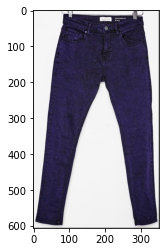

In [53]:
    for type in types:
        for i in range(0,len(types[type])):
            image = types[type][i]
            cv2.imwrite("test.jpg",image)
            plt.imshow(image)
            plt.show()

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
stores = [""]

In [38]:
for type in os.listdir("../database/images"):
    for image in os.listdir("../database/images" + "/" + type):
        file_name_without_extension = os.path.splitext(image)[0]
        x = file_name_without_extension
        random_price = np.round(np.random.uniform(10.0, 100.0, 1))
        random_integers = np.random.randint(1, 50, size=1)
        with open("../database/info/" + type + "/" + x + ".txt", 'w') as file:
            file.write("Store: store")
            file.write(str(random_integers[0]))
            file.write("\n")
            file.write("Price(dollars): ")
            file.write(str(random_price[0]))

In [29]:
random_amounts = np.round(np.random.uniform(10.0, 100.0, 1))
random_amounts[0]

72.0

In [32]:
random_integers = np.random.randint(1, 50, size=1)
random_integers[0]

30